In [1]:
#  For sting e changes I made in python files

In [2]:
from config import config
from tqdm import tqdm
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
import pickle
from scipy.interpolate import UnivariateSpline
from constants import pdm_constants

In [19]:
# Parameters ---
config["general"]["detector"] = "IceCube"
config["general"]["year"] = 9
mass_grid = np.logspace(1, 6, 20) # np.logspace(1, 6, 10)
sv_grid = np.logspace(-24, -21, 20) # 10
angle = config['atmospheric showers']['theta angles']
b = Atm_Shower()
mass_id = 11
sv_id = -1

In [4]:
surface_fluxes = pickle.load(open("../data/surf_store_v1.p", "rb"))
shower = surface_fluxes[20][3] # background fluxes at 20° ----

In [16]:
#aeff = Aeff()
#dete = Detector(aeff)


In [9]:
# Flux, Counts, effective area loading that need chaning depending on the day ....
ice_flux = {}
for m in mass_grid:
    for sv in sv_grid:
        ice_flux[m,sv] = pickle.load(open("/home/kruteesh/Desktop/dm_data_server/02_12/data/signal_flux/flux_%.1e_%.1e.pkl"%(m,sv),"rb"))
signal_m = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/02_12/data/limits_signal_IceCube.pkl','rb'))
background_po = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/background_pone.pkl','rb'))
eff_area = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/eff_area_ice.pkl','rb')) 
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/02_12/data/background_ice.pkl','rb'))
back = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/background_ice.pkl','rb'))
limits = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/02_12/data/limits_result.pkl','rb'))
pone_signal = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/pone_signal.pkl','rb'))

In [10]:
# Limits data Loading 

cl_lit = np.loadtxt('/home/kruteesh/Desktop/DM_nu_simulation_P-One/Literature/limits_Ice.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
m_1e4 = np.loadtxt("../data/m_1e4.csv",delimiter=",")
m_1e4 = (m_1e4[m_1e4[:, 0].argsort()])
m_1e2 = np.loadtxt("../data/m_1e2.csv",delimiter=",")
m_1e2 = (m_1e2[m_1e2[:, 0].argsort()])
m_1e6 = np.loadtxt("../data/m_1e6.csv",delimiter=",")
m_1e6 = (m_1e6[m_1e6[:, 0].argsort()])

Text(0.5, 0, '$m_{x}$ [GeV]')

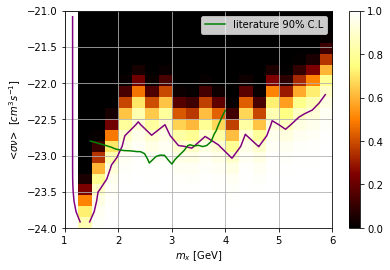

In [36]:
# Limits Comparision ----
plt.imshow(limits['numu'], extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                              min(np.log10(sv_grid)), max(np.log10(sv_grid))),
                     origin='lower', aspect='auto',cmap=plt.cm.afmhot)

plt.colorbar()
plt.contour(limits['numu'], levels=[0.9], colors='purple',
                origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))))  #  origin!!!!!!!!!!
plt.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')

plt.legend()
plt.grid()
plt.ylabel(r'<$\sigma \nu$>  [$cm^{3} s^{-1}$]')
plt.xlabel(r'$m_{x}$ [GeV]')

Text(0, 0.5, 'Effective Area [$cm^2$]')

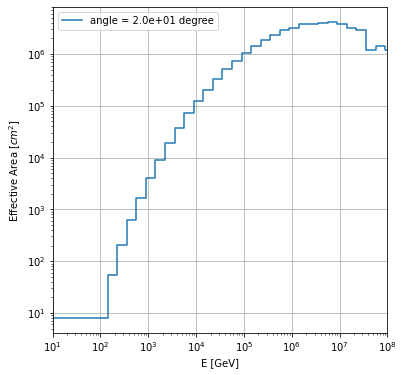

In [12]:
# Effective area comparision ----
plt.figure(figsize=(6,6))
plt.step(b.egrid,eff_area[angle[20]],label=r'angle = %.1e degree' %angle[20])
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e8)
#plt.ylim(1,1e7)
plt.legend()
plt.grid()
plt.xlabel('E [GeV]')
plt.ylabel(r'Effective Area [$cm^2$]')

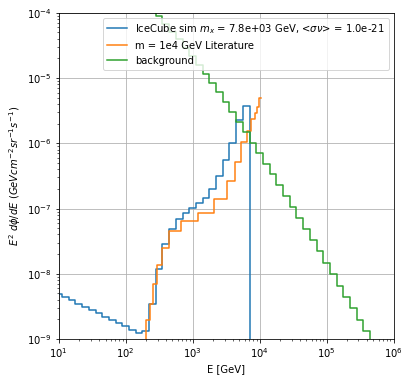

In [25]:
flux = ice_flux[mass_grid[mass_id], sv_grid[sv_id]] 
plt.figure(figsize=(6,6))
plt.step(b.egrid,(flux*b.egrid**2),label=r'IceCube sim $m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
plt.step(m_1e4[:, 0], m_1e4[:, 1],"-",label="m = 1e4 GeV Literature")
plt.step(b.egrid, shower*b.egrid**2, label='background')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e6)
plt.ylim(1e-9,1e-4)
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel(r'$E^2$ $d\phi/dE$ $(GeV cm^{-2} sr^{-1} s^{-1})$')
plt.grid()

The different values for sigmanu with icecube and pone are because of change in J factor for both of them !!!!!!!

In [14]:
#total_sig = []
#total_back = []
#for theta in tqdm(np.linspace(0,90,91)):
#    check_angle = theta
#    tmp_1 = []
#    back_c = []
#    signal_c = []
#    log_egrid = np.log10(b.egrid)
#    i = 0
#    flux_sig = dm.extra_galactic_flux(b.egrid, 1e4, 1e-24)
#    flux_back = aeff.effective_area_func(b.surface_fluxes, 9)[0][theta]
#    for j,id_check in enumerate(range(len(log_egrid))):
#        smearing_e, smearing = dete.smearing_function(
#                                                    log_egrid[
#                                                        id_check],
#                                                    check_angle,
#                                                    9)
#        # print(len(at_counts_unsm[theta]), len(smearing))
#        if len(smearing) < 3:
#            continue
#        local_sp = (UnivariateSpline(smearing_e,
#                                    (smearing),
#                                    k=1, s=0,
#                                    ext=1)(np.log10(b.egrid)))
#        back_c.append(local_sp*flux_back[id_check]) 
#        signal_c.append(local_sp*flux_sig[id_check])
#        i=j
#        tmp_1.append(1*np.trapz(local_sp,x=np.log10(b.egrid)))
#
#    total_back.append(np.sum(back_c,axis=0))
#    total_sig.append(np.sum(signal_c,axis=0))
#    tmp_bkgrd = np.sum(tmp_1, axis=0)
#
#total_back = np.sum(total_back, axis=0)
#total_sig = np.sum(total_sig, axis=0)


Text(0, 0.5, '# counts')

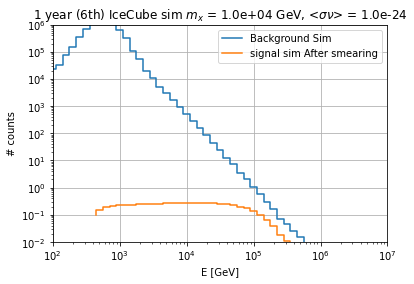

In [30]:
# Manual calculation of counts after smearing 
plt.title(r'1 year (6th) IceCube sim $m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(1e4,1e-24))
#plt.step(b.egrid, total_back,label='Background')
#plt.step(b.egrid, total_sig,label='Signal' )
plt.step(b.egrid,background_ic['numu'],label='Background Sim')
#plt.step(b.egrid,flux*b.ewidth*total_eff*3600*24*365,label=r'signal after manually conversion')
plt.step(b.egrid[-len(signal_m[mass_id][sv_id]):],signal_m[mass_id][sv_id],label="signal sim After smearing")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2,1e7)
plt.ylim(1e-2,1e6)
plt.grid()
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel(r'# counts')

In [ ]:
uptime_tot_dic = aeff.uptime_tot_dic
eff_dic = aeff.eff_dic()

In [ ]:
def effective_area_func(flux: dict, year: float, boolean_sig=False):
        """
        Try to make sense of this ----------- 01.09.21 !!!!!!!

        Parameters:
        -------------------------
        surface_fluxes: dic
        year: float

        returns:
        -------------------------
        unsmeared_atmos_counts: dic
        unsmeared_astro_counts: dic
        _egrid: numpy arra
        eff_areas : dic ------06.09.21

        """
        # Apply the effective area to the simulation and return unsmeared
        # counts

        ch_egrid = (eff_dic[year][:, 1] + eff_dic[year][:, 0])/2.
        ch_theta = (eff_dic[year][:, 2] + eff_dic[year][:, 3])/2.
        
        unsmeared_atmos_counts = {}
        eff_area = {}
        for j, theta in enumerate(list(flux.keys())):
            if boolean_sig:
                surf_counts = flux[theta]
            else:    
                surf_counts = flux[theta][-1]

            tmp_eff = []
            check_angle = (theta)

            for energy in b.egrid:
                if energy < 1e1:
                    tmp_eff.append(0.)

                else:

                    loge = np.log10(energy)
                    idE = np.abs(ch_egrid - loge).argmin()
                    all_near = (np.where(ch_egrid == ch_egrid[idE])[0])
                    idTheta = np.abs(ch_theta[all_near] - check_angle).argmin()
                    tmp_eff.append(eff_dic[year][all_near, -1][idTheta])
            loc_eff_area = np.array(tmp_eff)
            print(surf_counts)
            eff_area[theta] = loc_eff_area
            tmp_at_un = ((surf_counts *
                          loc_eff_area *
                          uptime_tot_dic[year] *
                          flux[theta][1] *
                          2. * np.pi))


            unsmeared_atmos_counts[theta] = tmp_at_un

        return unsmeared_atmos_counts, eff_area


In [ ]:
sign_c, eff_ar = effective_area_func(_flux, 9, boolean_sig=True)

NameError: name 'effective_area_func' is not defined

In [ ]:
sign_c

NameError: name 'sign_c' is not defined